# Imports
note book for random doodles

In [398]:
import functions as f


import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.precision', 4)
# pd.set_option('display.float_format', lambda x: f'{x:.4f}')

from scipy.stats import pearsonr, spearmanr


import matplotlib.pyplot as plt


import seaborn as sns


from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, label_binarize
from sklearn.feature_selection import SelectKBest, RFECV, f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
# from sklearn.linear_model import Lasso, Ridge  # For regularized regression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor

# #metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, mean_squared_error, roc_curve, auc
# from sklearn.datasets import make_classification


# EDA

In [399]:
X,y  = load_wine(return_X_y=True, as_frame=True)
rng = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=rng)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.2300,1.7100,2.4300,15.6000,127.0000,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065.0000
1,13.2000,1.7800,2.1400,11.2000,100.0000,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050.0000
2,13.1600,2.3600,2.6700,18.6000,101.0000,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185.0000
3,14.3700,1.9500,2.5000,16.8000,113.0000,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480.0000
4,13.2400,2.5900,2.8700,21.0000,118.0000,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735.0000


In [400]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## Correlations

In [401]:
rf = RandomForestClassifier(random_state=rng, n_jobs=-1)
rf.fit(X_train, y_train)
rf_feat_im = rf.feature_importances_
rf_feat_im
gb = GradientBoostingClassifier(random_state=rng)
gb.fit(X_train, y_train)
gb_feat_im = gb.feature_importances_
print('RF feat im\n',rf_feat_im,'\n', list(X_train.columns), '\n\nGB feat ims\n',gb_feat_im)

RF feat im
 [0.11629031 0.0168972  0.01163146 0.0231763  0.01631382 0.05294661
 0.16282826 0.01667937 0.03036334 0.23700461 0.07993835 0.10165744
 0.13427293] 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 

GB feat ims
 [1.61082744e-03 1.66124628e-02 2.90070562e-02 1.03712087e-02
 1.68945028e-02 1.63237910e-03 1.00633332e-01 8.88580277e-05
 9.92544099e-05 3.14761610e-01 2.89734643e-03 2.55383578e-01
 2.50007584e-01]


In [402]:
estimator = RandomForestClassifier(random_state=rng, n_jobs=-1)
cv = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=100,
    random_state=rng)
rf_feat_select = RFECV(estimator=estimator,
                       cv=cv,
                       n_jobs=-1)
rf_feat_select.fit(X_train, y_train)
pd.DataFrame(rf_feat_select.cv_results_)



,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,split50_test_score,split51_test_score,split52_test_score,split53_test_score,split54_test_score,split55_test_score,split56_test_score,split57_test_score,split58_test_score,split59_test_score,split60_test_score,split61_test_score,split62_test_score,split63_test_score,split64_test_score,split65_test_score,split66_test_score,split67_test_score,split68_test_score,split69_test_score,split70_test_score,split71_test_score,split72_test_score,split73_test_score,split74_test_score,split75_test_score,split76_test_score,split77_test_score,split78_test_score,split79_test_score,split80_test_score,split81_test_score,split82_test_score,split83_test_score,split84_test_score,split85_test_score,split86_test_score,split87_test_score,split88_test_score,split89_test_score,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,split100_test_score,split101_test_score,split102_test_score,split103_test_score,split104_test_score,split105_test_score,split106_test_score,split107_test_score,split108_test_score,split109_test_score,split110_test_score,split111_test_score,split112_test_score,split113_test_score,split114_test_score,split115_test_score,split116_test_score,split117_test_score,split118_test_score,split119_test_score,split120_test_score,split121_test_score,split122_test_score,split123_test_score,split124_test_score,split125_test_score,split126_test_score,split127_test_score,split128_test_score,split129_test_score,split130_test_score,split131_test_score,split132_test_score,split133_test_score,split134_test_score,split135_test_score,split136_test_score,split137_test_score,split138_test_score,split139_test_score,split140_test_score,split141_test_score,split142_test_score,split143_test_score,split144_test_score,split145_test_score,split146_test_score,split147_test_score,split148_test_score,split149_test_score,split150_test_score,split151_test_score,split152_test_score,split153_test_score,split154_test_score,split155_test_score,split156_test_score,split157_test_score,split158_test_score,split159_test_score,split160_test_score,split161_test_score,split162_test_score,split163_test_score,split164_test_score,split165_test_score,split166_test_score,split167_test_score,split168_test_score,split169_test_score,split170_test_score,split171_test_score,split172_test_score,split173_test_score,split174_test_score,split175_test_score,split176_test_score,split177_test_score,split178_test_score,split179_test_score,split180_test_score,split181_test_score,split182_test_score,split183_test_score,split184_test_score,split185_test_score,split186_test_score,split187_test_score,split188_test_score,split189_test_score,split190_test_score,split191_test_score,split192_test_score,split193_test_score,split194_test_score,split195_test_score,split196_test_score,split197_test_score,split198_test_score,split199_test_score,split200_test_score,split201_test_score,split202_test_score,split203_test_scor

In [403]:
print(rf_feat_select.score(X_train, y_train))

1.0


In [404]:
print("Optimal number of features:", rf_feat_select.n_features_)


Optimal number of features: 13


In [405]:
print("Selected features:", X_train.columns[rf_feat_select.support_])


Selected features: Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [406]:
print("Feature ranking:\n", pd.Series(rf_feat_select.ranking_, index=X_train.columns))


Feature ranking:
 alcohol                         1
malic_acid                      1
ash                             1
alcalinity_of_ash               1
magnesium                       1
total_phenols                   1
flavanoids                      1
nonflavanoid_phenols            1
proanthocyanins                 1
color_intensity                 1
hue                             1
od280/od315_of_diluted_wines    1
proline                         1
dtype: int64


## Model Training

In [407]:
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', GradientBoostingClassifier(random_state=rng))
        
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred
class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.88      0.93        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



In [408]:
param_grid = {
    'model__n_estimators':[125,150,175],
    'model__learning_rate': [0.1, 0.3, 0.5, 0.7]
}
grid = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
class_report = classification_report(y_test, y_pred)

In [409]:
print(class_report)
print(grid.best_estimator_)
print(grid.best_params_)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.88      0.93        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(n_estimators=150,
                                            random_state=RandomState(MT19937) at 0x22E76EC8240))])
{'model__learning_rate': 0.1, 'model__n_estimators': 150}


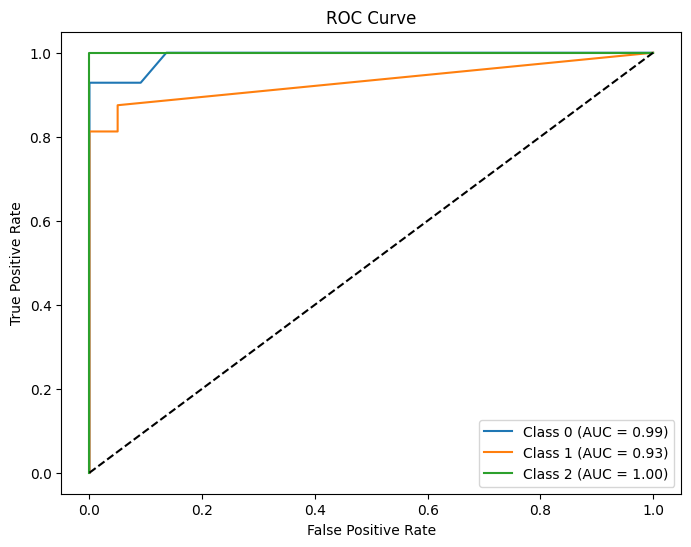

In [410]:
# Binarize y_test for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], pipeline.decision_function(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# End